# 1. Initial data transformation


## Import libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
pd.options.mode.chained_assignment = None
import re  # Regular expressions
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Data transformation
from sklearn.model_selection import train_test_split, cross_val_score  # Data testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Prediction Model
from sklearn.metrics import accuracy_score, classification_report  # Comparison between real and predicted
from sklearn.preprocessing import LabelEncoder  # Variable encoding and decoding for XGBoost
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud  # Word visualization
import matplotlib.pyplot as plt  # Plotting properties
import seaborn as sns  # Plotting properties
from xgboost import XGBClassifier
import joblib

### Download tokenizers and corporas

In [2]:
# Necessary Downloads which we will use in future
nltk.download('stopwords")
nltk.download("punkt")
nltk.download('wordnet")
nltk.download('punkt_tab")

### Read data and do data exploration

In [4]:
#Validation dataset
val=pd.read_csv("Data/twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv("Data/twitter_training.csv", header=None)

In [5]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [10]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


### Data Visualization with word clouds and histograms

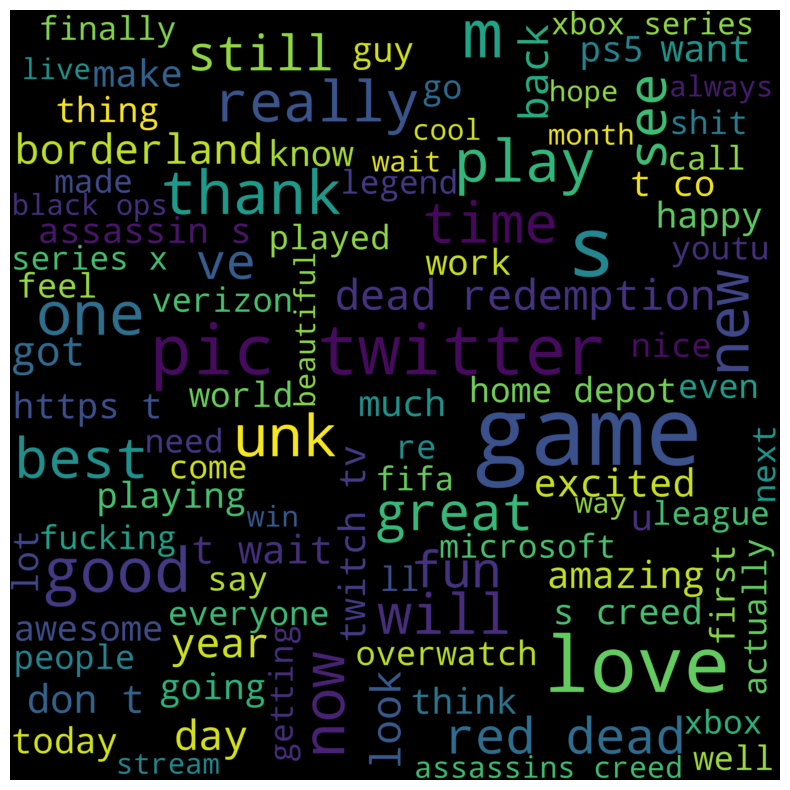

In [11]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

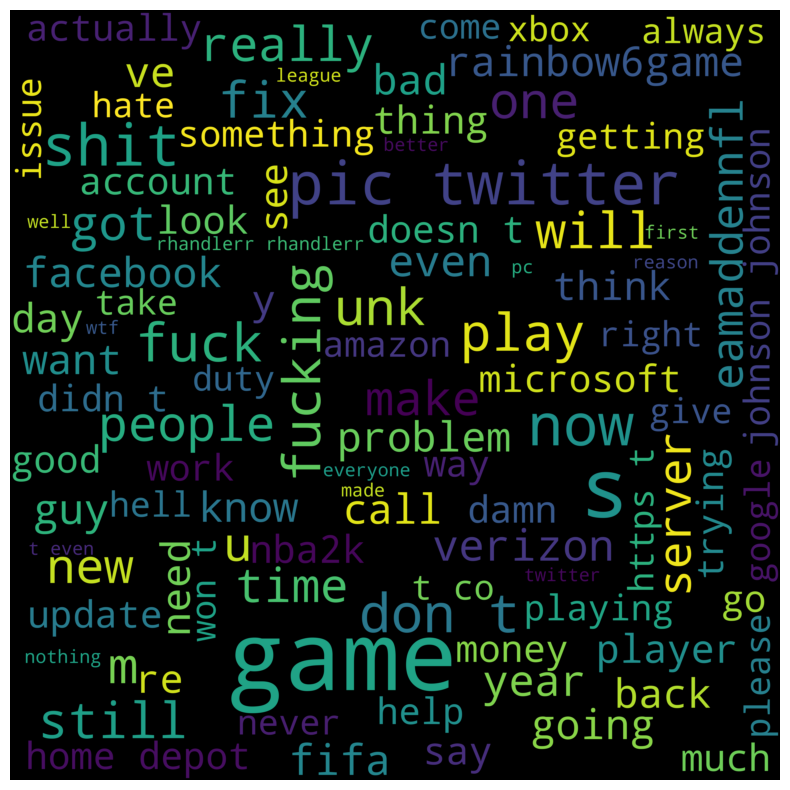

In [12]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

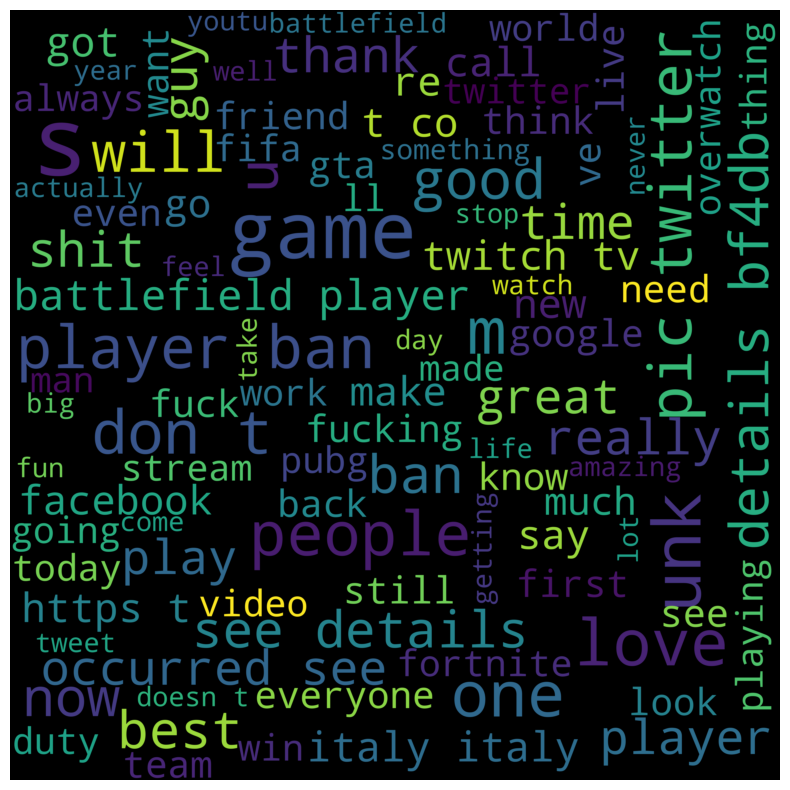

In [13]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

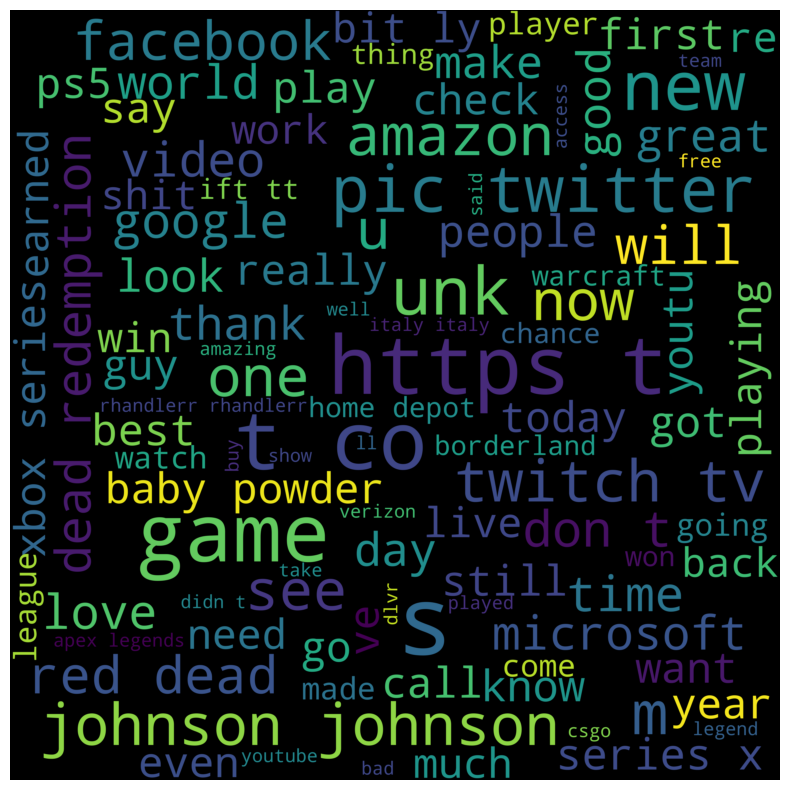

In [14]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


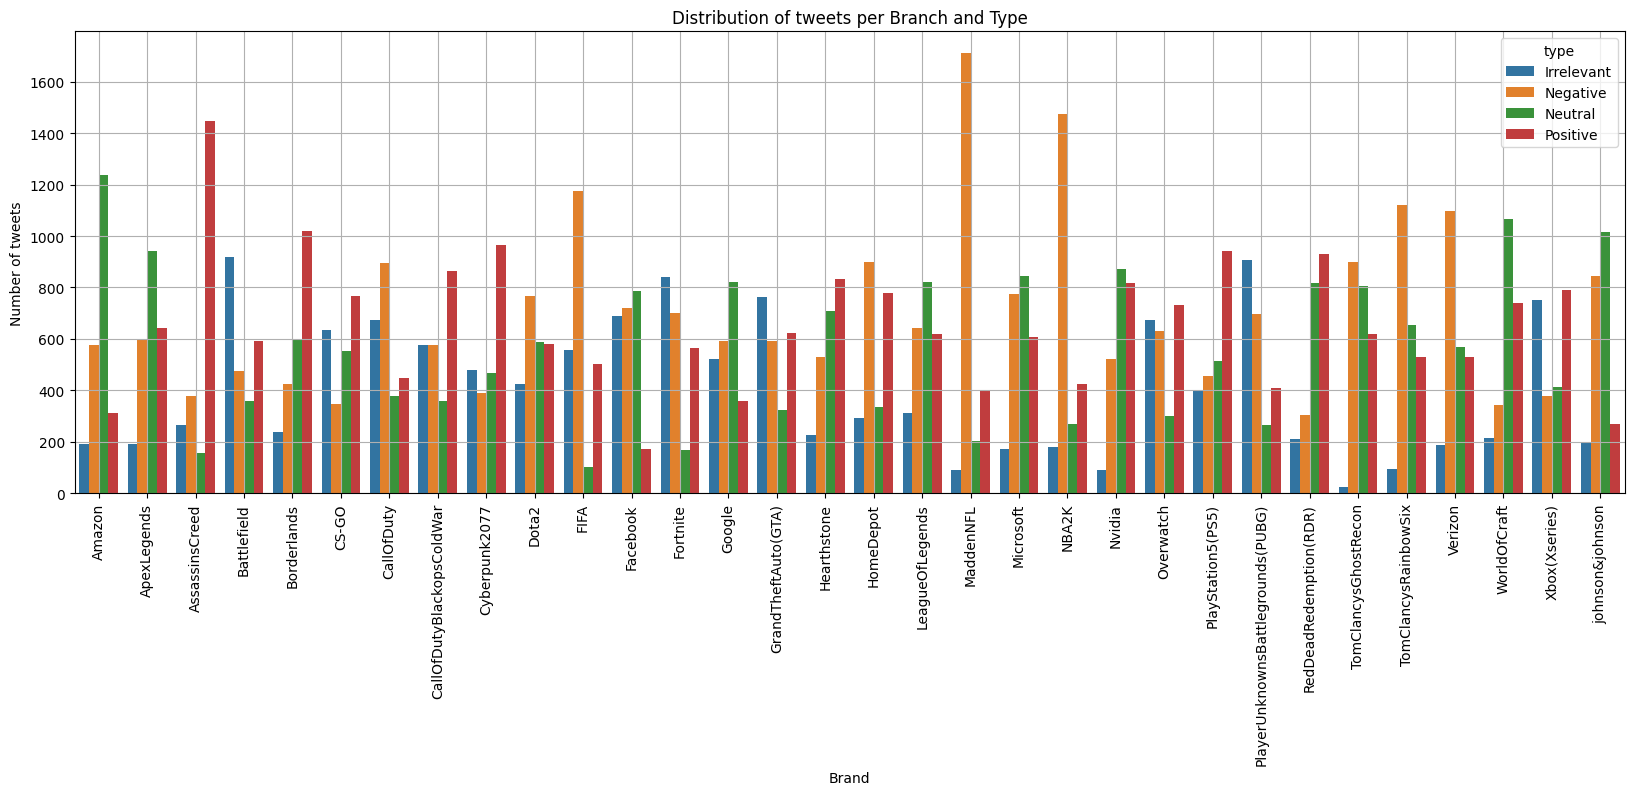

In [16]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

## Text analysis


In [17]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [18]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [19]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

## Logistic Regression model


In [20]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [21]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [22]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

d:\Projects\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Projects\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [23]:
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 161222 stored elements and shape (14937, 28993)>

In [24]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [25]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [26]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

In [27]:
#Model is save next time just load it
joblib.dump(model1,"Lg_model1.pkl")

In [28]:
# Load the Model
model1=joblib.load("Lg_model1.pkl")

In [29]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [30]:
X_val_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12913 stored elements and shape (1000, 28993)>

In [31]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


In [32]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

d:\Projects\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4142213 stored elements and shape (59745, 1427378)>

In [34]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

In [35]:
joblib.dump(model2,"Lg_model2.pkl")

In [36]:
model2=joblib.load("Lg_model2.pkl")

In [37]:
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.6


### Test Logistic Regression model

In [38]:
# Tweet Classification Function
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove special characters
    tweet = re.sub('[^A-Za-z0-9 ]+', ' ', tweet)
    return tweet

def classify_tweet(tweet, model, vectorizer):
    # Preprocess the tweet
    preprocessed_tweet = preprocess_tweet(tweet)

    # Transform the tweet using the same vectorizer
    tweet_bow = vectorizer.transform([preprocessed_tweet])

    # Predict the sentiment
    prediction = model.predict(tweet_bow)

    return prediction[0]

# Example usage
new_tweet = "I absolutely love this product! It's amazing!"
sentiment = classify_tweet(new_tweet, model2, bow_counts)
print(f"The sentiment of the tweet is: {sentiment}")

The sentiment of the tweet is: Positive


In [41]:
import ipywidgets as widgets
from IPython.display import display

# Create a text area for input
text_area = widgets.Textarea(
    value='',
    placeholder='Type your tweet here...',
    description='Tweet:',
    disabled=False,
    layout=widgets.Layout(width='500px', height='100px')
)

# Create a button for classification
button = widgets.Button(description="Classify")

# Create an output widget to display results
output = widgets.Output()

# Define the classification function
def on_button_clicked(b):
    tweet = text_area.value
    with output:
        output.clear_output()
        print(f"Tweet: {tweet}")
        sentiment = classify_tweet(tweet, model2, bow_counts)
        print(f"Sentiment: {sentiment}")

# Link the button click to the classification function
button.on_click(on_button_clicked)

# Display all widgets
display(text_area, button, output)

Textarea(value='', description='Tweet:', layout=Layout(height='100px', width='500px'), placeholder='Type your …

Button(description='Classify', style=ButtonStyle())

Output()

# Random Forest Model

In [42]:
# Load and preprocess data
train = pd.read_csv("Data/twitter_training.csv", header=None)
val = pd.read_csv("Data/twitter_validation.csv", header=None)

In [43]:
train.columns = ['id', 'information', 'type', 'text']
val.columns = ['id', 'information', 'type', 'text']

In [44]:
def preprocess_text(text):
    # Check if text is a string before applying regex
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove special characters and numbers
        text = re.sub(r'\W|\d', ' ', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize
        tokens = nltk.word_tokenize(text)
        # Remove stopwords and lemmatize
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        # Handle non-string values (e.g., return an empty string or a placeholder)
        return ''

In [45]:
train['processed_text'] = train['text'].apply(preprocess_text)
val['processed_text'] = val['text'].apply(preprocess_text)

In [46]:
# Feature engineering
def get_text_length(text):
    # Check if text is a string before applying split
    if isinstance(text, str):
        return len(text.split())
    else:
        # Handle non-string values (e.g., return 0 or a placeholder)
        return 0

train['text_length'] = train['text'].apply(get_text_length)
val['text_length'] = val['text'].apply(get_text_length)

In [47]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(train['processed_text'])
X_val_tfidf = tfidf.transform(val['processed_text'])

In [48]:
# Add text length feature
X_train = np.hstack((X_train_tfidf.toarray(), train['text_length'].values.reshape(-1,1)))
X_val = np.hstack((X_val_tfidf.toarray(), val['text_length'].values.reshape(-1,1)))

In [49]:
y_train = train['type']
y_val = val['type']

In [50]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# #  Train Random Forest model (Added n_jobs for parallel Processing)
rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1 ,random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

In [52]:
# Save Model
joblib.dump(rf_model,"rf_model.pkl")

In [54]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=3, n_jobs=-1)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

In [55]:
joblib.dump(cv_scores,"cv_scores.pkl")

In [57]:
# Predict on validation set
y_val_pred = rf_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.945

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.95      0.93       172
    Negative       0.93      0.96      0.94       266
     Neutral       0.96      0.93      0.94       285
    Positive       0.97      0.94      0.95       277

    accuracy                           0.94      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.95      0.94      0.95      1000



## Test Random Forest Model with custom input as tweet prompt

In [53]:
# Load The Model
rf_model=joblib.load("rf_model.pkl")

In [58]:
# Function to classify new tweets
def classify_tweet(tweet, model, vectorizer):
    processed_tweet = preprocess_text(tweet)
    tweet_tfidf = vectorizer.transform([processed_tweet])
    tweet_length = get_text_length(tweet)
    tweet_features = np.hstack((tweet_tfidf.toarray(), np.array([tweet_length]).reshape(1,-1)))
    return model.predict(tweet_features)[0]

In [59]:
# Interactive classification
import ipywidgets as widgets
from IPython.display import display

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

text_area = widgets.Textarea(
    value='',
    placeholder='Type your tweet here...',
    description='Tweet:',
    disabled=False,
    layout=widgets.Layout(width='500px', height='100px')
)

button = widgets.Button(description="Classify")
output = widgets.Output()

def on_button_clicked(b):
    tweet = text_area.value
    with output:
        output.clear_output()
        print(f"Tweet: {tweet}")
        sentiment = classify_tweet(tweet, rf_model, tfidf)
        print(f"Sentiment: {sentiment}")

button.on_click(on_button_clicked)
display(text_area, button, output)

Textarea(value='', description='Tweet:', layout=Layout(height='100px', width='500px'), placeholder='Type your …

Button(description='Classify', style=ButtonStyle())

Output()